In [113]:
directory_path = 'data/task_7'

import os 
entries = os.listdir(directory_path)
files = sorted([entry for entry in entries if os.path.isfile(os.path.join(directory_path, entry))])

import pickle
list_of_dict = []
for file_name in files: 
    file_path = os.path.join(directory_path,file_name)
    with open(file_path, 'rb') as file: 
        dict = pickle.load(file)
        list_of_dict.append(dict)
        
print(f"Number of files in \"{directory_path}\": \t{len(files)}")
print(f"Number of files in imported list: \t{len(list_of_dict)}")

Number of files in "data/task_7": 	47455
Number of files in imported list: 	47455


[0, 82.31310835759855, 95.09324404707772, 59.47143570147035, 54.44471209318987, 42.703320382027606, 90.9854101074655, 36.56325744071861, 0]
[0, 70.60097540877298, 45.79684649342082, 35.51945276851168, 25.759141374824615, 57.36565710316881, 53.23116900317908, 74.20117341198298, 0]
Processing Time is 15398.0


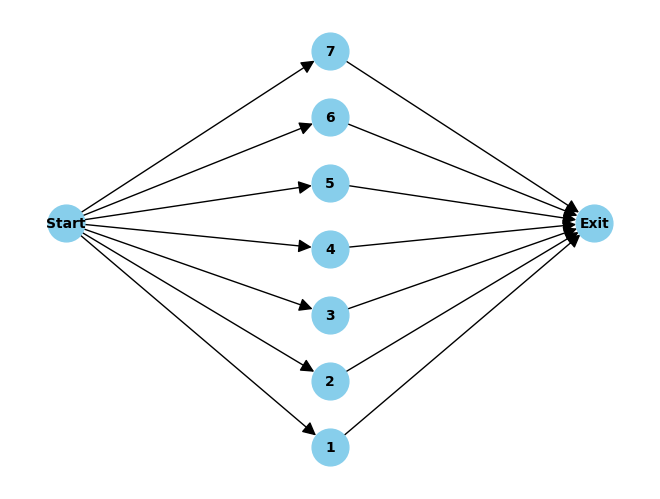

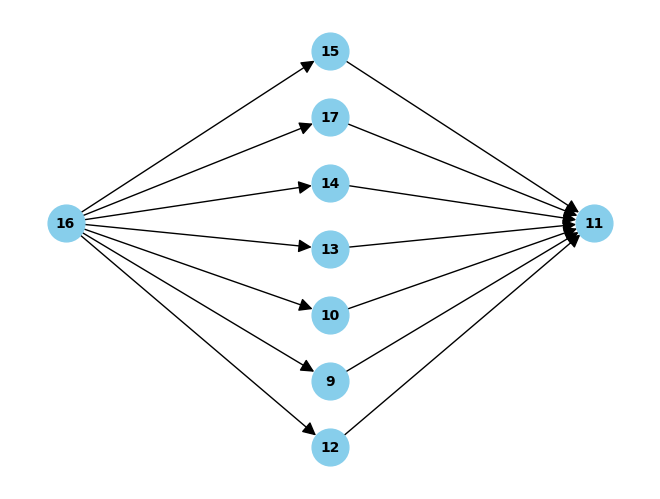

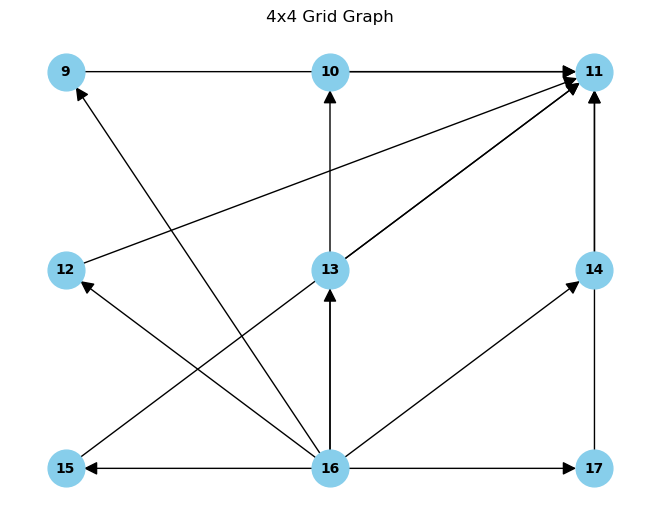

In [114]:

import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np 

def visGraph(graph, pos=None):
    if pos is None:
        pos = nx.spring_layout(graph, seed=42)
        pos['Start'] = np.array([-1,0])
        pos['Exit'] = np.array([1,0])
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
    plt.show()

network_4x4 = {16: (0, 3), 17: (1, 3), 18: (2, 3), 19: (3, 3),
               20: (0, 2), 21: (1, 2), 22: (2, 2), 23: (3, 2),
               24: (0, 1), 25: (1, 1), 26: (2, 1), 27: (3, 1),
               28: (0, 0), 29: (1, 0), 30: (2, 0), 31: (3, 0)}

network_3x3 = {9: (0, 2), 10: (1, 2), 11: (2, 2),
              12: (0, 1), 13: (1, 1), 14: (2, 1),
              15: (0, 0), 16: (1, 0), 17: (2, 0)}

def visGraphGrid(edges, network_pos):
    nodes = list(range(9,18,1))
    G = nx.DiGraph()
    G.add_nodes_from(nodes)

    for edge in edges:
        G.add_edge(edge[0], edge[1])
    
    nx.draw(G, network_pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
    plt.title('4x4 Grid Graph')
    plt.show()

task = list_of_dict[100]
task_graph = task['task_graph']

map_graph = task['map_graph']
task_demands = [demands[0] for demands in task['demand']]
task_demands.insert(0,0)
task_demands.append(0)
task_duration = task['duration']
task_duration.insert(0,0)
task_duration.append(0)

print(task_demands)
print(task_duration)
print(f"Processing Time is {task['processing_time']}")

visGraph(task_graph, pos=task['task_graph_pos'])
visGraph(map_graph, pos=task['map_graph_pos'])
visGraphGrid(map_graph.edges, network_3x3)

In [115]:
import torch
from torch_geometric.data import Data

edge_list = list(map_graph.edges) 
node_list = list(map_graph.nodes)
node_mapping = {old_index: new_index for new_index, old_index in enumerate(node_list)}

edge_index = torch.tensor([(node_mapping[edge[0]], node_mapping[edge[1]]) for edge in edge_list]).t().contiguous()

In [130]:
# Features 
# Node Level Features
pe = torch.tensor(node_list).view(-1,1).float()
demand = torch.tensor(task_demands).view(-1,1).float()
duration = torch.tensor(task_duration).view(-1,1).float()

x = torch.cat([ pe, demand, duration], dim=1)
print(f"Node Level Feature \n{x}\n")

# Edge Level Features
def manhattan_distance(src,dst):
    x1, y1 = src
    x2, y2 = dst
    return abs(x2 - x1) + abs(y2 - y1)

distance_list = []
for edge in edge_list:
    src_node = edge[0]
    dest_node = edge[1]

    src_node_loc = network_3x3[src_node]
    dest_node_loc = network_3x3[dest_node]

    distance = manhattan_distance(src_node_loc, dest_node_loc)
    distance_list.append(distance)

distance = torch.tensor(distance_list).view(-1,1).float()
print(f"Edge Lelvel feature \n{distance}\n")

data = Data(x=x, edge_index=edge_index, edge_attr=distance)
print(data)
data.validate()

Node Level Feature 
tensor([[16.0000,  0.0000,  0.0000],
        [12.0000, 82.3131, 70.6010],
        [ 9.0000, 95.0932, 45.7968],
        [10.0000, 59.4714, 35.5195],
        [13.0000, 54.4447, 25.7591],
        [14.0000, 42.7033, 57.3657],
        [17.0000, 90.9854, 53.2312],
        [15.0000, 36.5633, 74.2012],
        [11.0000,  0.0000,  0.0000]])

Edge Lelvel feature 
tensor([[2.],
        [3.],
        [2.],
        [1.],
        [2.],
        [1.],
        [1.],
        [3.],
        [2.],
        [1.],
        [2.],
        [1.],
        [2.],
        [4.]])

Data(x=[9, 3], edge_index=[2, 14], edge_attr=[14, 1])


True